# PyTorch Transformations
This demo covers Tranformations using PyTorch when dealing with image data.

### Why Transformations Review
In PyTorch, **transforms** are primarily used for **data preprocessing** and **augmentation**. They are essential in preparing data for deep learning models by applying various operations to the dataset, which can improve the efficiency and performance of a model. PyTorch's `torchvision.transforms` module provides a convenient way to apply these operations on image data.

Here’s why PyTorch transforms are important:

### 1. **Data Preprocessing**
Transforms help convert raw data (e.g., images) into a format that can be fed into a model. For instance, images need to be converted to PyTorch tensors, resized to the required dimensions, or normalized to a certain range of values.


### 2. **Data Augmentation**
Data augmentation helps improve the model’s generalization by artificially increasing the size of the training dataset. By applying random transformations (like flipping, rotating, or cropping), models can learn to generalize better and avoid overfitting.


### 3. **Improve Model Accuracy**
By augmenting the data with random transformations, the model becomes more robust to variations in the input data. For example, a model trained on both original and rotated images can handle different orientations of objects during inference.

### 4. **Pipelines**
Transforms can be easily chained together using `transforms.Compose()`. This allows for a flexible, reusable pipeline where multiple transformations are applied in sequence. For instance, you can resize an image, convert it to a tensor, and then normalize it with one `Compose` call.


### Conclusion
PyTorch transforms simplify preprocessing data to the right format for the model, augmenting data to create diversity in training, and improving model robustness. They simplify the data preparation process and are essential tools in computer vision tasks.

#### NOTE:
The ones you see here are ones that could potentially be good for building image classification models.

Please be sure to try some out on your own and/or read the documentation for other available transformations.

https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended 

In [139]:
# helper function
import matplotlib.pyplot as plt

def display_images(original_image, new_image=None, new_image_name=None):
    """
    Helper function to display to images
    """
    if new_image is not None:
        # Create a figure with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        # Display the original image
        axes[0].imshow(original_image)
        axes[0].axis('on')  # Turn off the axis for cleaner display
        axes[0].set_title('Original Image')
        # Display the new image
        axes[1].imshow(new_image)
        axes[1].axis('on')  # Turn off the axis for cleaner display
        axes[1].set_title(new_image_name)
    else:
        # Create a single row figure
        fig = plt.figure(figsize=(10, 5))
        # Display only a single image
        plt.imshow(original_image)
        plt.axis('on')

    # Show the plot
    plt.show()

# Getting started with Transformations

In [140]:
# Import v2 of transforms
from torchvision.transforms import v2

In [141]:
# Import v1 of transforms
from torchvision import transforms

In [142]:
# Define an image
from PIL import Image

original_image = Image.open('images/cat/cat-1.jpg')
print(original_image)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x137A92FD0>


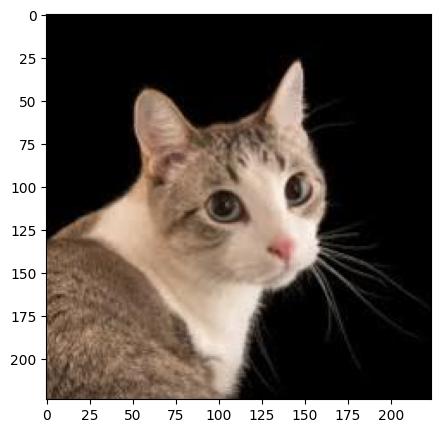

In [143]:
# Show image using our helper function
display_images(original_image=original_image)

### Resize()
Resize an image in pixels. This would ensure that all images are being presented in the same size.

In [144]:


# Using the Resize the image to 50 x 25 pixels using Resize()
resize_transform = v2.Resize((50, 25))
# Transform it
resized_image = resize_transform(original_image)



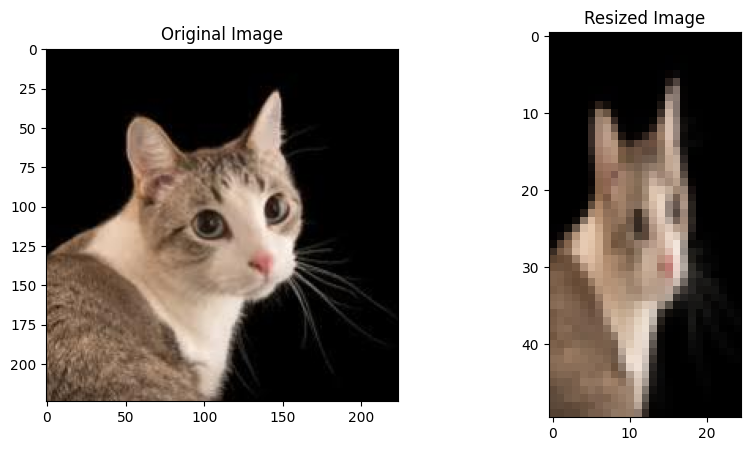

In [145]:
# Show new image resize
display_images(original_image=original_image, new_image=resized_image, new_image_name="Resized Image")

In [146]:
# Lets try again with v1

## RandomHorizontalFlip()
Horizontally flip the input with a given probability.

In [147]:
# Set a Random Horizontal Flip augmentation to a probability of 1 (100%)
rhf_transform = v2.RandomHorizontalFlip(p=1)
# Tranform it
rhf_image = rhf_transform(original_image)


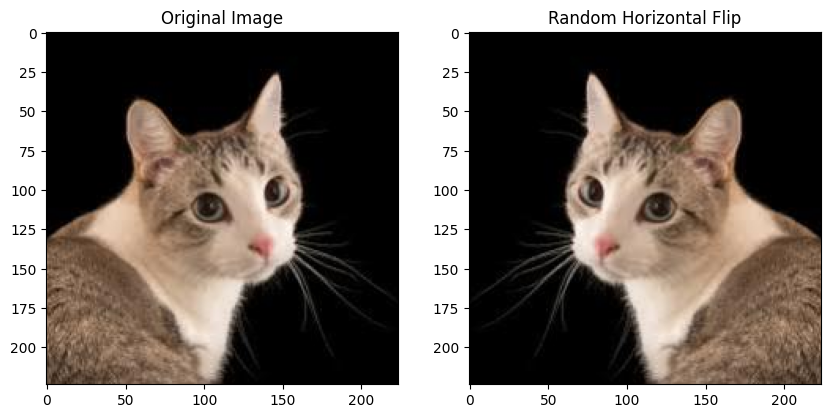

In [148]:
# View the transform
display_images(original_image=original_image, new_image=rhf_image, new_image_name="Random Horizontal Flip")

## ToTensor()
Simply transform an image into a Tensor. This is necessary format for training a PyTorch model.

In [149]:
# Create transformation using ToTensor()
tensor_tranform = v2.ToTensor()
# Apply it to our original image
tensor_image = tensor_tranform(original_image)


In [150]:
# Print the original image format and the new
print(f"Original Image: {original_image}")
print(f"Tensor Image: \n{tensor_image}")

Original Image: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x137A92FD0>
Tensor Image: 
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.3412, 0.4275, 0.4706,  ..., 0.0000, 0.0000, 0.0000],
         [0.3333, 0.4118, 0.4667,  ..., 0.0000, 0.0000, 0.0000],
         [0.3294, 0.3647, 0.3961,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2667, 0.3529, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
         [0.2588, 0.3373, 0.3922,  ..., 0.0000, 0.0000, 0.0000],
         [0.2549, 0.2902, 0.3216,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0

## Normalize()
Normalize a tensor image or video with mean and standard deviation.

**NOTE**: This will NOT work on a PIL image (original_image). It must be in a tensor format.

In [151]:
# Using our tensor image above, lets normalize it
normalize_transform = v2.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# Apply using the tensor_image above
normalized_image = normalize_transform(tensor_image)

In [152]:
# Print the normalized tensor and the original tensor
print(normalized_image)
print(tensor_image)

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-0.3176, -0.1451, -0.0588,  ..., -1.0000, -1.0000, -1.0000],
         [-0.3333, -0.1765, -0.0667,  ..., -1.0000, -1.0000, -1.0000],
         [-0.3412, -0.2706, -0.2078,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-0.4667, -0.2941, -0.2078,  ..., -1.0000, -1.0000, -1.0000],
         [-0.4824, -0.3255, -0.2157,  ..., -1.0000, -1.0000, -1.0000],
         [-0.4902, -0.4196, -0.3569,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1

#### What just happened?

The pixel values of images are typically in the range [0, 1] if they are converted to tensors using ToTensor() or [0, 255] in their raw form. This normalization effectively scales these values into a range centered around zero.

This will:

    Subtract 0.5 from each pixel value, making the range roughly centered around zero.
    Divide by 0.5, which scales the pixel values to a range of [-1, 1].

#### Why normalize to this range?

Normalizing the pixel values to a standard range like [-1, 1] (or another centered range) helps deep learning models learn more efficiently because it standardizes the input data. It often leads to faster convergence and improved model performance.

#### Tuples explained
The first tuple (0.5, 0.5, 0.5) represents the mean values for each RGB channel.

The second tuple (0.5, 0.5, 0.5) represents the standard deviation values for each RGB channel.

## RandomCrop()
Crop the input at a random location. This is not a probability but random location.

In [153]:
# Randomly crop the image at a random location 
rc_transform = v2.RandomCrop(size=(100, 100))
# Run the random crop
rc_image = rc_transform(original_image)


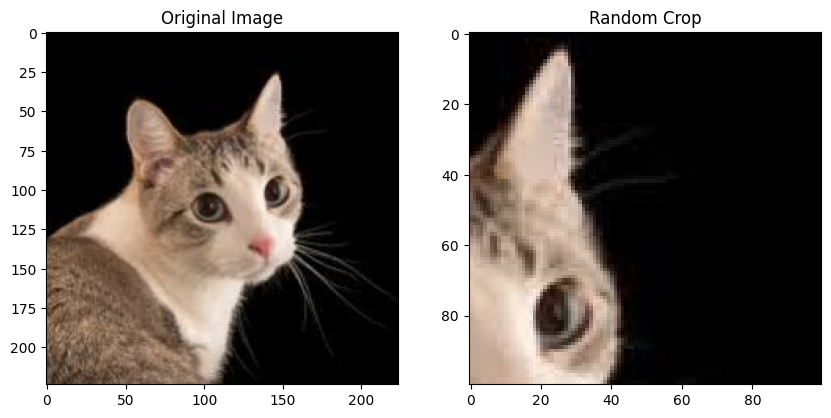

In [154]:
# View the transform
display_images(original_image=original_image, new_image=rc_image, new_image_name="Random Crop")

In [155]:
# NOTE: Run it a couple of times to see that it changes locations each time.

## RandomPhotometricDistort()
Randomly distorts the image or video. Adjust the contrast, saturation, hue, brightness, and also randomly permutes channels.

In [156]:
# Create the Distort. Notice the different settings.
rpd_transform = v2.RandomPhotometricDistort(
    brightness=(0.875, 1.125), 
    contrast=(0.5, 1.5), 
    saturation=(0.5, 1.5),
    hue=(- 0.05, 0.05), 
    p=1
)

# Create the augmentation
rpd_image = rpd_transform(original_image)

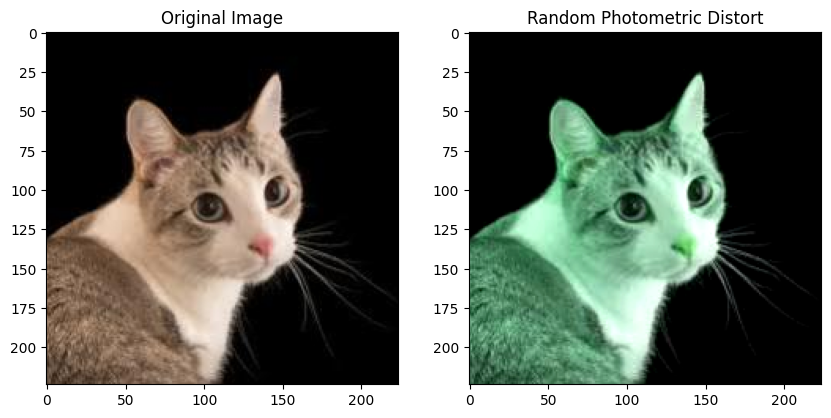

In [157]:
# View the differences
display_images(original_image=original_image, new_image=rpd_image, new_image_name="Random Photometric Distort")

In [158]:
# NOTE: Run it several times to see the difference.

## RandomResize()
Randomly resize the input. This may or may not be a good option keep in mind. 

In [159]:
# Create transform
rr_transform = v2.RandomResize(min_size=100, max_size=200)
# Apply the augmentation
rr_image = rr_transform(original_image)

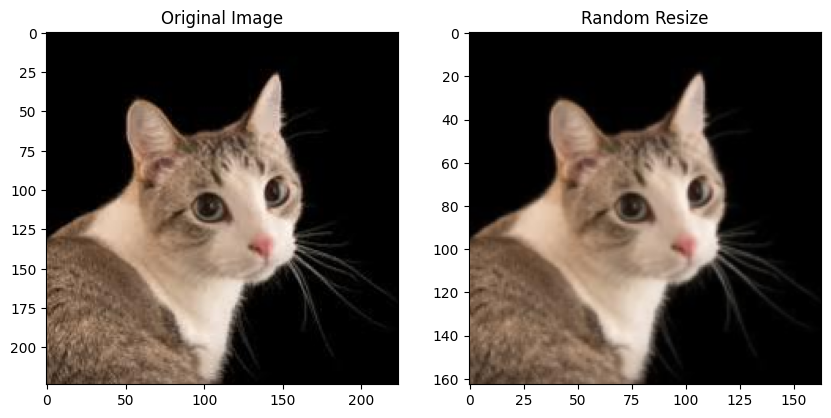

In [160]:
# View the differences
display_images(original_image=original_image, new_image=rr_image, new_image_name="Random Resize")

# Pipelines with Compose()
Compose() allows for use to build a pipeline of transformations on images.

In [161]:
# Lets build a pipeline using the above transformations. We define this in a list.
transforms_pipeline = v2.Compose([
    v2.RandomCrop(size=(100, 100)),
    v2.RandomPhotometricDistort(
        brightness=(0.875, 1.125), 
        contrast=(0.5, 1.5), 
        saturation=(0.5, 1.5),
        hue=(- 0.05, 0.05), 
        p=1),
    v2.RandomResize(min_size=75, max_size=150),
    v2.RandomHorizontalFlip(p=1)
])

In [162]:
# Apply the pipeline to our original image
pipeline_image = transforms_pipeline(original_image)

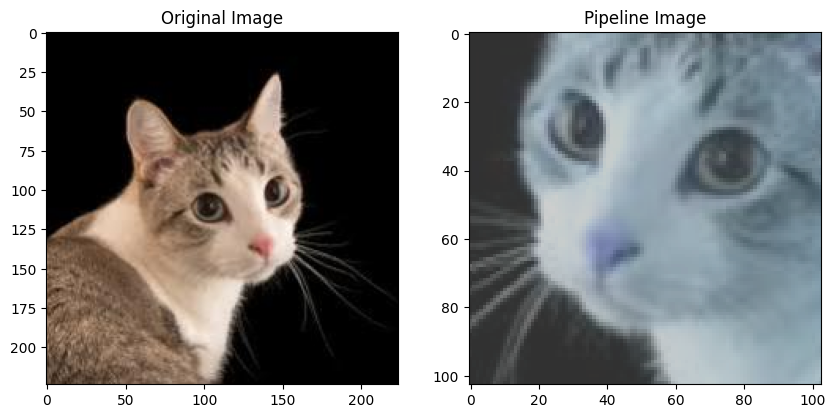

In [163]:
# View the original to the new
display_images(original_image=original_image, new_image=pipeline_image, new_image_name="Pipeline Image")

# Integrating with Datasets
Lets load the FashionMNIST preloaded Dataset from the previous section and see how we can apply our transform pipeline to those images.

In [164]:
# Import the torchvision datasets library
import torchvision.datasets

In [165]:
# Create a dataset first without our pipeline
original_image_dataset = torchvision.datasets.FashionMNIST(root='./fashion', train=False, download=True)

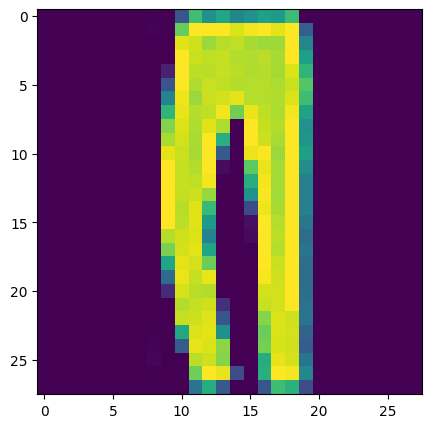

In [166]:
# Get an image from the dataset
original_image, label = original_image_dataset[2]
# View it
display_images(original_image=original_image)

In [167]:
# Create a new pipeline to fit the dataset
transforms_pipeline = v2.Compose([
    v2.RandomCrop(size=(15, 15)), # Adjust the crop to fit the image size
    v2.RandomPhotometricDistort(
        brightness=(0.875, 1.125), 
        contrast=(0.5, 1.5), 
        saturation=(0.5, 1.5),
        hue=(- 0.05, 0.05), 
        p=1),
    v2.RandomResize(min_size=10, max_size=15), # Adjust the crop to fit the image size
    v2.RandomHorizontalFlip(p=1)
])

In [168]:
# Create a new datset with our pipeline
pipeline_image_dataset = torchvision.datasets.FashionMNIST(root='./fashion', train=False, download=True, 
                                                           transform=transforms_pipeline)

In [171]:
# Get the same image from above but from the new dataset
pipeline_image, label = pipeline_image_dataset[2]

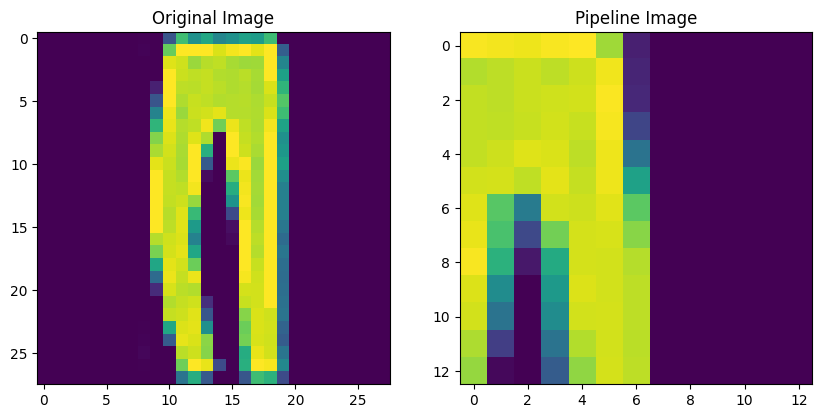

In [172]:
# View the images together
display_images(original_image=original_image, new_image=pipeline_image, new_image_name="Pipeline Image")